# Let's Grow More(LGMVIP) - "DATA SCIENCE INTERN

# LGMVIP JULY-2023

# Author - Aalekhya M

# Task:Music Recommendation with Machine Learning


cross validation:Cross-validation is a statistical technique used in machine learning and model evaluation to assess how well a model performs on unseen data.



emsembling techinques include bagging,boosting,random forest classifier,stacking etc

In [3]:
#Load Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [5]:
#Read the data
music_df = pd.read_csv("train.csv")
music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [6]:
music_df.shape

(7377418, 6)

Is used to randomly sample a fraction of the rows from the DataFrame specifically, it will select approximately 10% (0.1) of the rows from the DataFrame.

In [7]:

music_df = music_df.sample(frac=0.1)

In [8]:
music_df.describe()

,target
count,737742.000000
mean,0.503928
std,0.499985
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 1666730 to 2425634
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                737742 non-null  object
 1   song_id             737742 non-null  object
 2   source_system_tab   735216 non-null  object
 3   source_screen_name  696277 non-null  object
 4   source_type         735560 non-null  object
 5   target              737742 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 39.4+ MB


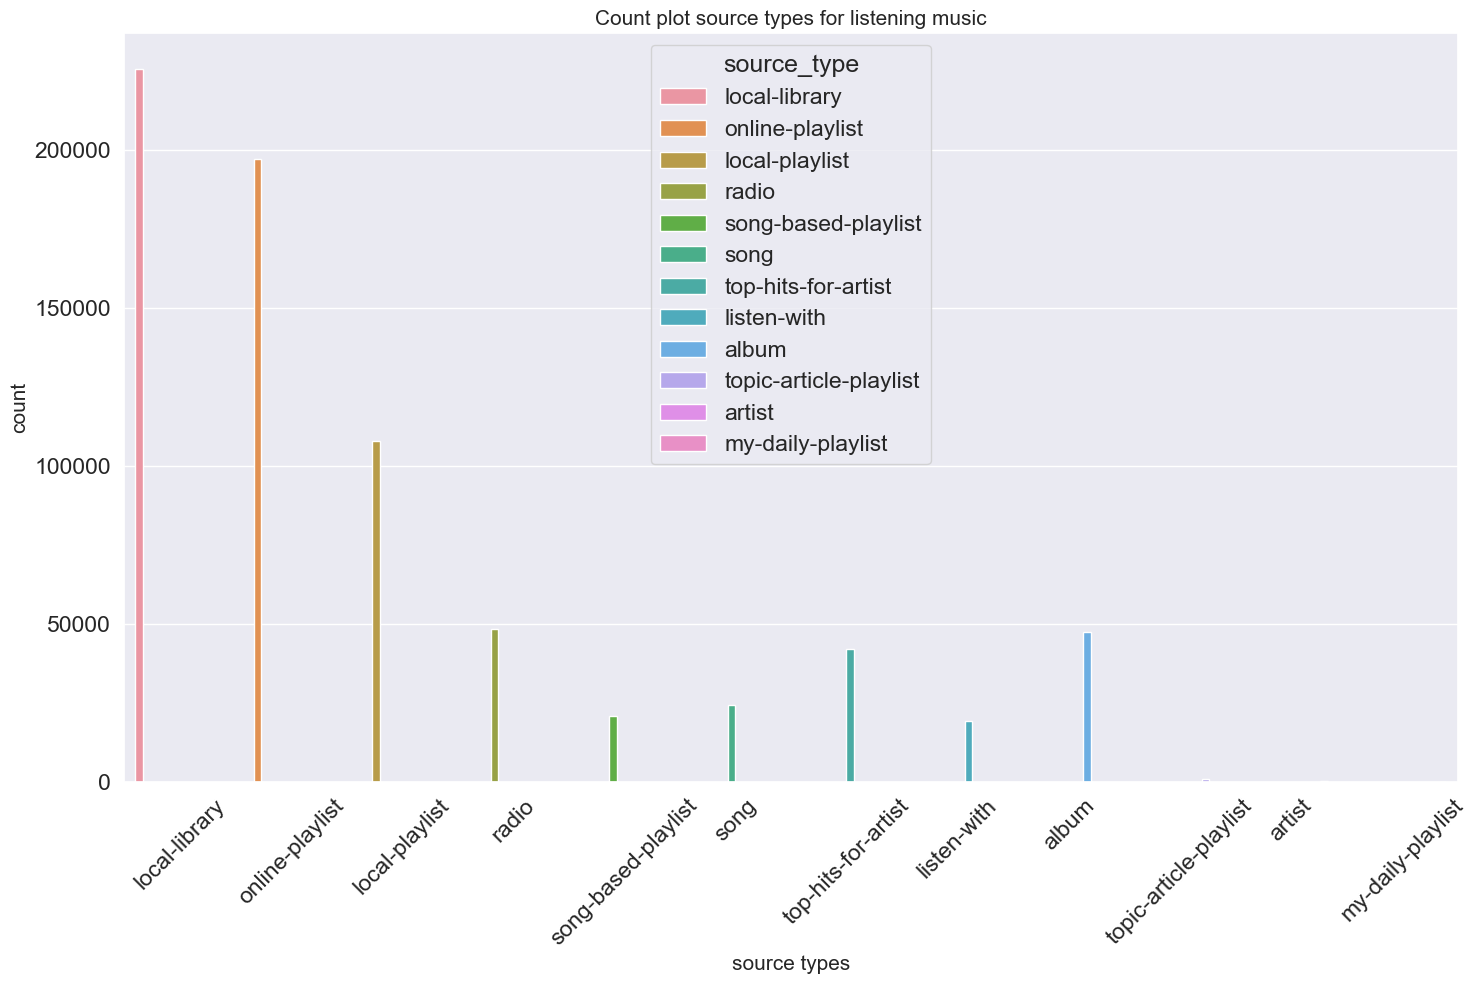

In [10]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.countplot(x='source_type',hue='source_type',data=music_df)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=15)
plt.tight_layout()

we can see that local library are more perffered than any other source types as well after that online playlist

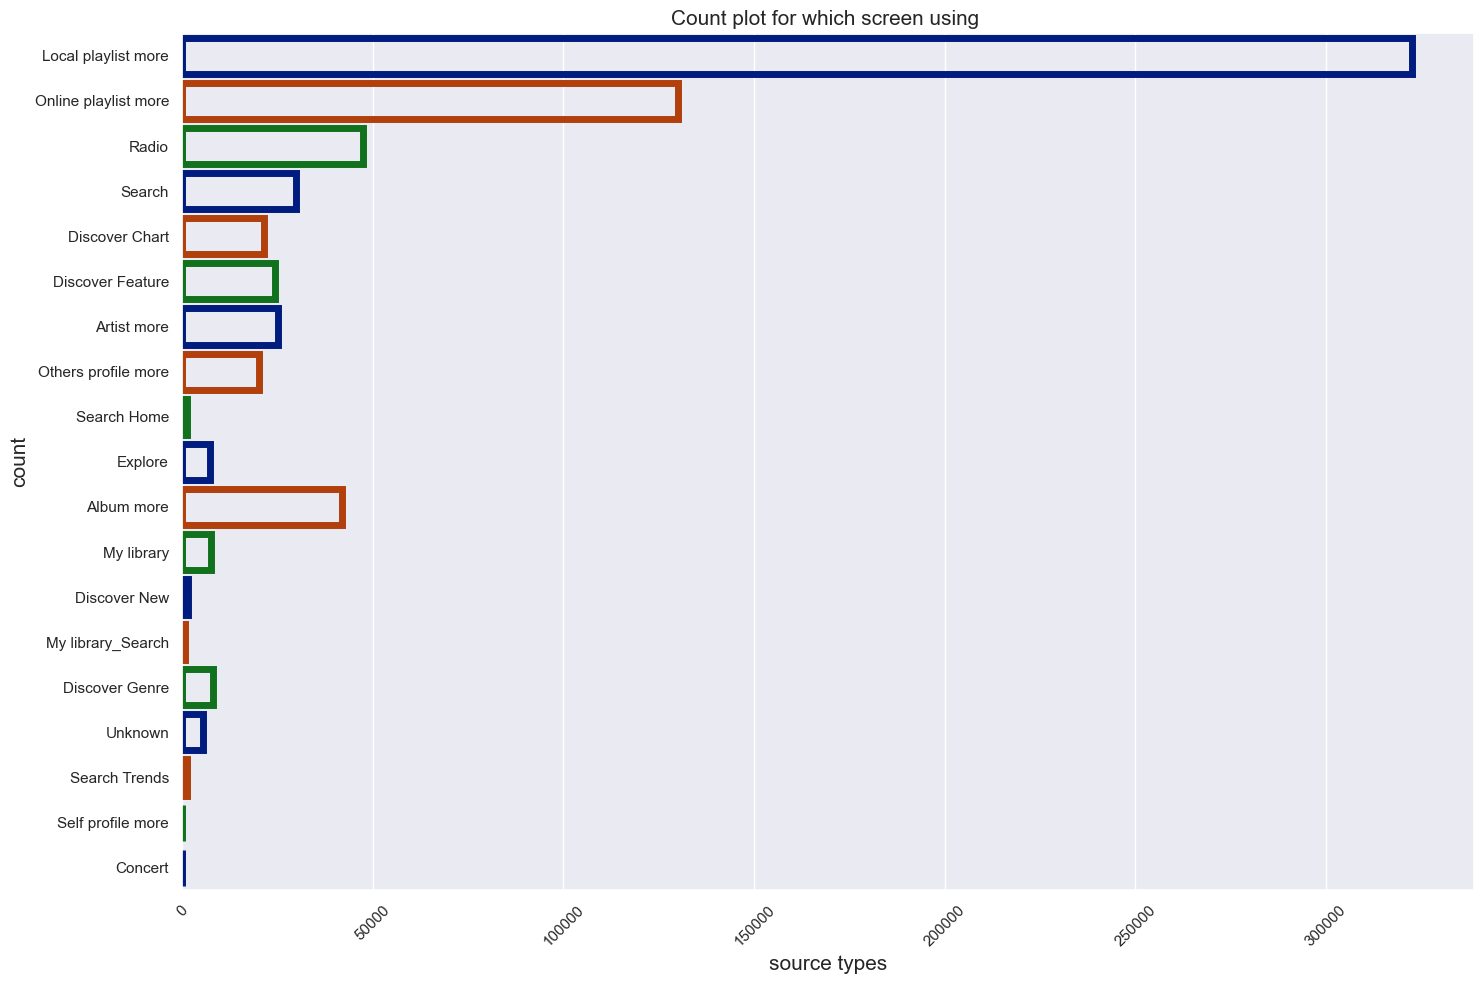

In [11]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.countplot(y='source_screen_name',data=music_df,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='45')
plt.title('Count plot for which screen using ',fontsize=15)
plt.tight_layout()


we can see that local play list has the highest preference

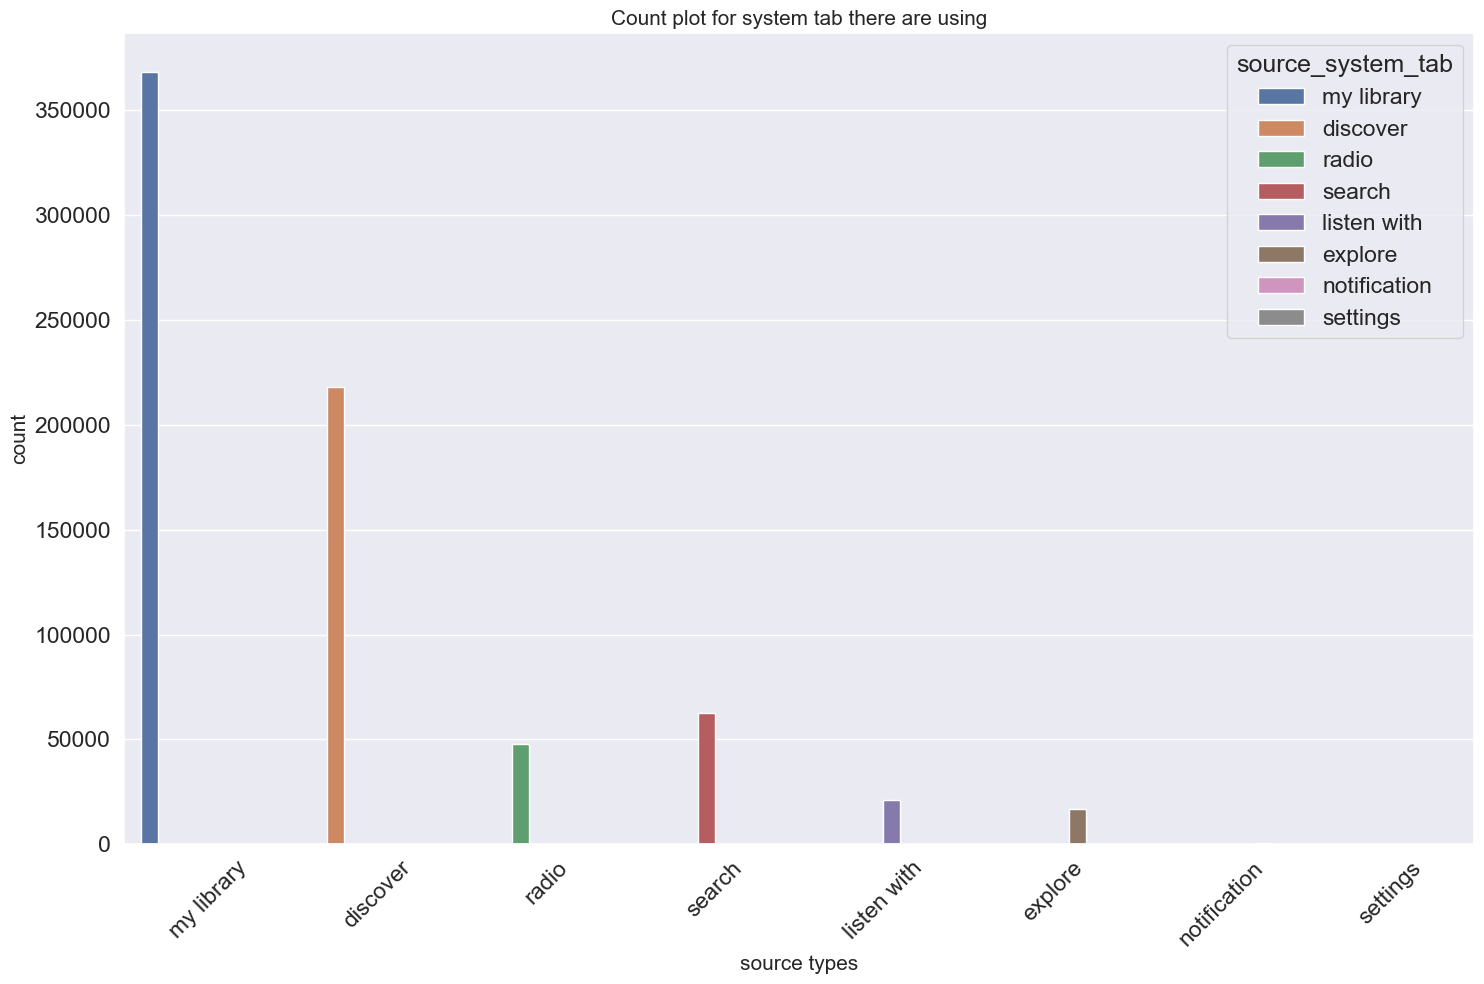

In [12]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.countplot(x='source_system_tab',hue='source_system_tab',data=music_df)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using',fontsize=15)
plt.tight_layout()


In [13]:
#Read the music_df file
music_df = music_df.sample(frac=0.1)

In [14]:
songs_df = pd.read_csv("songs.csv")
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [15]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [16]:
#Merge that file into existing dataframe
music_df = pd.merge(music_df, songs_df,on="song_id", how="left")
music_df.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,9Lvvq4T/Mt8NFO56dGeSf6uX44q511IC3kDIJ/gZKQs=,GCoV3YWkMZ98iYnydAOi7hQp4DiU6Lzz9ZuXtO95jGA=,discover,Discover Genre,online-playlist,0,385436.0,465,Beyoncé,Beyoncé| Diana Gordon| Kevin Cossum| Alex Deli...,Beyoncé| Diana Gordon| Kevin Cossum| Alex Deli...,52.0
1,c1a6gmji2ojAP5/UiyQkmK33oMgY0RZJXg4S436DoAA=,SEXmGAIKrBLJvU2yqL7G0KUkKq81WgLwrzy/GHyPjYE=,discover,Search,online-playlist,1,242207.0,465,Jason Mraz,Jason Mraz,Jason Mraz,52.0
2,erZ5MoJMV+qgmt2R7WgbIJuGvmcI8whVgjrue3r4dQw=,YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=,discover,Online playlist more,online-playlist,1,185295.0,451,陳奕迅 (Eason Chan),Tang Han Xiao,Tang Han Xiao,3.0
3,uh6XP6zZZxxc7XCwBXWOsh3Apgrev6t3CkEApkahoyc=,7H2IrlPrvdofbRwMcUZXhdyAwKWYwh6LcMHeqTdEqm8=,my library,Local playlist more,local-library,1,235102.0,465,BIGBANG,NaN,NaN,31.0
4,wg5HGYjBB+RsQDgTYryoXhqIJ1a+yvLRSeu57yfsYX8=,fLcg1JwIF80DBi1D5gheP1WuO4IXt4HFSd19TZ6y61M=,my library,Local playlist more,local-library,0,233871.0,465|1011,Taylor Swift,Taylor Swift,NaN,52.0


In [17]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                73774 non-null  object 
 1   song_id             73774 non-null  object 
 2   source_system_tab   73556 non-null  object 
 3   source_screen_name  69571 non-null  object 
 4   source_type         73569 non-null  object 
 5   target              73774 non-null  int64  
 6   song_length         73773 non-null  float64
 7   genre_ids           72512 non-null  object 
 8   artist_name         73773 non-null  object 
 9   composer            57075 non-null  object 
 10  lyricist            42107 non-null  object 
 11  language            73773 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 7.3+ MB


In [18]:
#reading the members file
members_df = pd.read_csv("members.csv")
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [19]:
#merging it into original dataframe
music_df = pd.merge(music_df, members_df, on="msno", how="left")
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73556 non-null  object 
 3   source_screen_name      69571 non-null  object 
 4   source_type             73569 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73773 non-null  float64
 7   genre_ids               72512 non-null  object 
 8   artist_name             73773 non-null  object 
 9   composer                57075 non-null  object 
 10  lyricist                42107 non-null  object 
 11  language                73773 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  44331 non-null

In [20]:
#check for null values now
music_df.isnull().any()

msno                      False
song_id                   False
source_system_tab          True
source_screen_name         True
source_type                True
target                    False
song_length                True
genre_ids                  True
artist_name                True
composer                   True
lyricist                   True
language                   True
city                      False
bd                        False
gender                     True
registered_via            False
registration_init_time    False
expiration_date           False
dtype: bool

Handling the missing values:
The first line handles missing values in columns of data type 'object', replacing them with the string 'unknown'.
The second line handles missing values in all other numeric columns (if any), replacing them with the numeric value 0.

In [21]:
# since we have null values, we replace null values
for item in music_df.select_dtypes(include=['object']).columns:
    music_df[item][music_df[item].isnull()]='unknown'
music_df = music_df.fillna(value=0)

In [22]:
music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,9Lvvq4T/Mt8NFO56dGeSf6uX44q511IC3kDIJ/gZKQs=,GCoV3YWkMZ98iYnydAOi7hQp4DiU6Lzz9ZuXtO95jGA=,discover,Discover Genre,online-playlist,0,385436.0,465,Beyoncé,Beyoncé| Diana Gordon| Kevin Cossum| Alex Deli...,Beyoncé| Diana Gordon| Kevin Cossum| Alex Deli...,52.0,1,0,unknown,7,20150920,20170923
1,c1a6gmji2ojAP5/UiyQkmK33oMgY0RZJXg4S436DoAA=,SEXmGAIKrBLJvU2yqL7G0KUkKq81WgLwrzy/GHyPjYE=,discover,Search,online-playlist,1,242207.0,465,Jason Mraz,Jason Mraz,Jason Mraz,52.0,11,27,male,7,20111127,20170930
2,erZ5MoJMV+qgmt2R7WgbIJuGvmcI8whVgjrue3r4dQw=,YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=,discover,Online playlist more,online-playlist,1,185295.0,451,陳奕迅 (Eason Chan),Tang Han Xiao,Tang Han Xiao,3.0,15,17,male,7,20140910,20180408
3,uh6XP6zZZxxc7XCwBXWOsh3Apgrev6t3CkEApkahoyc=,7H2IrlPrvdofbRwMcUZXhdyAwKWYwh6LcMHeqTdEqm8=,my library,Local playlist more,local-library,1,235102.0,465,BIGBANG,unknown,unknown,31.0,15,0,female,3,20151122,20170923
4,wg5HGYjBB+RsQDgTYryoXhqIJ1a+yvLRSeu57yfsYX8=,fLcg1JwIF80DBi1D5gheP1WuO4IXt4HFSd19TZ6y61M=,my library,Local playlist more,local-library,0,233871.0,465|1011,Taylor Swift,Taylor Swift,unknown,52.0,1,0,unknown,7,20140507,20170923


In [23]:
music_df.isnull().any()

msno                      False
song_id                   False
source_system_tab         False
source_screen_name        False
source_type               False
target                    False
song_length               False
genre_ids                 False
artist_name               False
composer                  False
lyricist                  False
language                  False
city                      False
bd                        False
gender                    False
registered_via            False
registration_init_time    False
expiration_date           False
dtype: bool

In [24]:
#Seperate Dates
music_df.registration_init_time = pd.to_datetime(music_df.registration_init_time, format="%Y%m%d",errors='ignore')
music_df["registration_init_time_year"]  = music_df.registration_init_time.dt.year
music_df["registration_init_time_month"] = music_df.registration_init_time.dt.month
music_df["registration_init_time_day"]   = music_df.registration_init_time.dt.day

#expiration date
music_df.expiration_date = pd.to_datetime(music_df.expiration_date,  format='%Y%m%d', errors='ignore')
music_df['expiration_date_year'] = music_df['expiration_date'].dt.year
music_df['expiration_date_month'] = music_df['expiration_date'].dt.month
music_df['expiration_date_day'] = music_df['expiration_date'].dt.day

In [25]:
#Dates to categoty
music_df['registration_init_time'] = music_df['registration_init_time'].astype('category')
music_df['expiration_date'] = music_df['expiration_date'].astype('category')

In [26]:
music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,9Lvvq4T/Mt8NFO56dGeSf6uX44q511IC3kDIJ/gZKQs=,GCoV3YWkMZ98iYnydAOi7hQp4DiU6Lzz9ZuXtO95jGA=,discover,Discover Genre,online-playlist,0,385436.0,465,Beyoncé,Beyoncé| Diana Gordon| Kevin Cossum| Alex Deli...,...,unknown,7,2015-09-20,2017-09-23,2015,9,20,2017,9,23
1,c1a6gmji2ojAP5/UiyQkmK33oMgY0RZJXg4S436DoAA=,SEXmGAIKrBLJvU2yqL7G0KUkKq81WgLwrzy/GHyPjYE=,discover,Search,online-playlist,1,242207.0,465,Jason Mraz,Jason Mraz,...,male,7,2011-11-27,2017-09-30,2011,11,27,2017,9,30
2,erZ5MoJMV+qgmt2R7WgbIJuGvmcI8whVgjrue3r4dQw=,YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=,discover,Online playlist more,online-playlist,1,185295.0,451,陳奕迅 (Eason Chan),Tang Han Xiao,...,male,7,2014-09-10,2018-04-08,2014,9,10,2018,4,8
3,uh6XP6zZZxxc7XCwBXWOsh3Apgrev6t3CkEApkahoyc=,7H2IrlPrvdofbRwMcUZXhdyAwKWYwh6LcMHeqTdEqm8=,my library,Local playlist more,local-library,1,235102.0,465,BIGBANG,unknown,...,female,3,2015-11-22,2017-09-23,2015,11,22,2017,9,23
4,wg5HGYjBB+RsQDgTYryoXhqIJ1a+yvLRSeu57yfsYX8=,fLcg1JwIF80DBi1D5gheP1WuO4IXt4HFSd19TZ6y61M=,my library,Local playlist more,local-library,0,233871.0,465|1011,Taylor Swift,Taylor Swift,...,unknown,7,2014-05-07,2017-09-23,2014,5,7,2017,9,23


In [27]:
music = music_df.copy()

In [28]:
for item in music.columns:
    if music[item].dtype == 'object':
        music[item] = music[item].astype('category')

In [29]:
#convert into encoding after categorical data
for col in music.select_dtypes(include=['category']).columns:
    music[col] = music[col].cat.codes#It assigns a unique integer code to each unique category in the column.

In [30]:
music.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.007928,0.012411,-0.008208,-0.001903,-0.000959,-0.000265,0.003147,0.001106,-0.001523,...,-0.015700,-0.002984,0.003948,0.014461,0.004105,0.006922,0.008746,0.000973,0.017593,-0.001483
song_id,-0.007928,1.000000,-0.002387,0.006486,0.001865,-0.003762,-0.011907,0.012010,-0.015778,-0.033624,...,0.000709,-0.007166,0.007189,-0.001851,0.007552,-0.006812,-0.000923,-0.002028,-0.001129,-0.000401
source_system_tab,0.012411,-0.002387,1.000000,-0.050475,-0.087460,0.036952,0.025639,0.036533,0.039898,0.048310,...,-0.027426,0.032040,-0.044311,0.051884,-0.038540,-0.024513,0.005168,0.035997,0.009690,0.005145
source_screen_name,-0.008208,0.006486,-0.050475,1.000000,0.413869,-0.057721,0.023669,-0.021030,0.011971,0.023391,...,0.018062,-0.028505,0.043620,-0.033586,0.041480,0.001722,-0.001347,-0.022417,-0.011457,-0.001541
source_type,-0.001903,0.001865,-0.087460,0.413869,1.000000,-0.124596,0.011829,-0.057329,-0.020185,0.000114,...,0.019797,-0.026496,0.036356,-0.047334,0.033743,0.005291,-0.002115,-0.036813,-0.004873,-0.002709
target,-0.000959,-0.003762,0.036952,-0.057721,-0.124596,1.000000,-0.000810,0.016552,0.011223,-0.000092,...,-0.005342,0.015504,0.001742,0.058686,0.002270,-0.000542,-0.001798,0.042485,0.012328,0.000387
song_length,-0.000265,-0.011907,0.025639,0.023669,0.011829,-0.000810,1.000000,0.028377,0.112379,0.094196,...,0.001896,0.003183,-0.005528,0.009981,-0.005644,0.002093,-0.001929,0.005303,0.003743,-0.002180
genre_ids,0.003147,0.012010,0.036533,-0.021030,-0.057329,0.016552,0.028377,1.000000,0.196866,0.148772,...,-0.005964,0.007086,-0.005385,0.006116,-0.007059,0.007369,-0.002274,0.003837,-0.002401,0.003498
artist_name,0.001106,-0.015778,0.039898,0.011971,-0.020185,0.011223,0.112379,0.196866,1.000000,0.348757,...,-0.007665,0.002527,-0.014312,0.009691,-0.014581,0.004181,-0.003190,0.002891,0.006509,-0.000373
composer,-0.001523,-0.033624,0.048310,0.023391,0.000114,-0.000092,0.094196,0.148772,0.348757,1.000000,...,-0.008175,-0.002620,-0.001357,0.007603,-0.001097,0.002291,-0.005029,0.007980,-0.001097,-0.008359


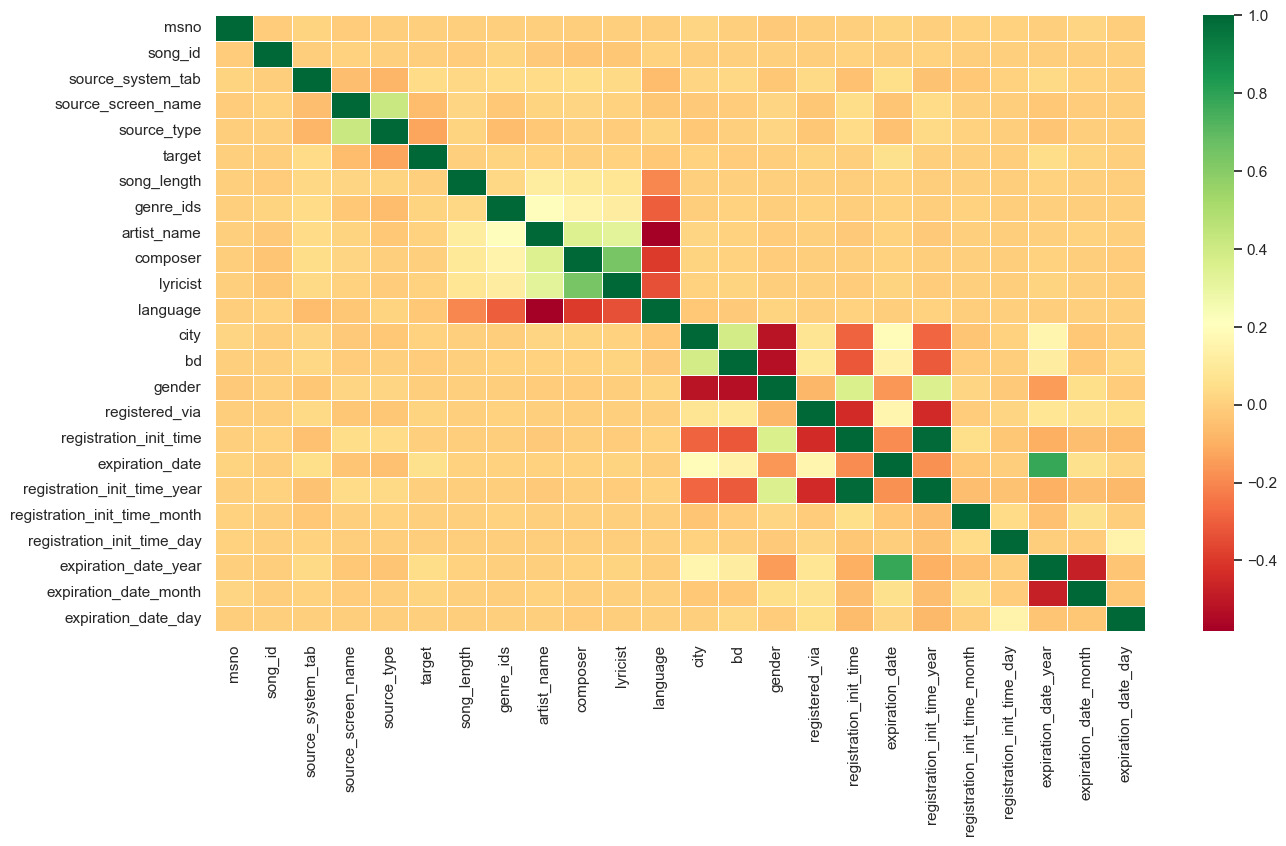

In [31]:
#Generating heatmap for correlation plot
plt.figure(figsize=[15,8])
sns.heatmap(music.corr(),cmap='RdYlGn', linewidths=0.4)
plt.show()

# Modelling and Predicting

In [32]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(music[music.columns[music.columns != 'target']], music.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

visualizing the imporatant features obtained by the model with the original features excluding the target column of the data frame using barplot

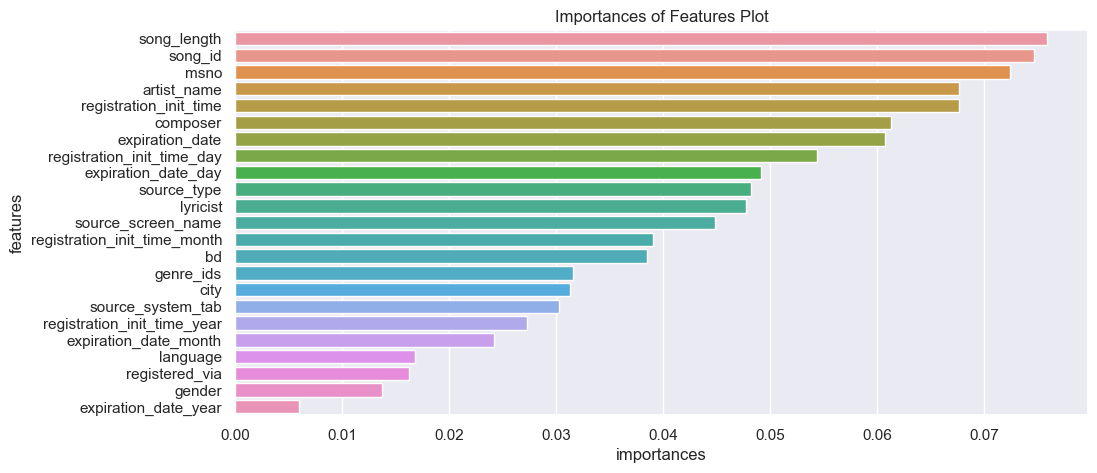

In [33]:
music_plot = pd.DataFrame({'features': music.columns[music.columns != 'target'],'importances': model.feature_importances_})
music_plot = music_plot.sort_values('importances', ascending=False)

#plotting the importance of features
plt.figure(figsize=[11,5])
sns.barplot(x = music_plot.importances, y = music_plot.features)
plt.title('Importances of Features Plot')
plt.show()


In [34]:
model.feature_importances_

array([0.07244191, 0.07469193, 0.03024654, 0.04482   , 0.04822418,
       0.07592937, 0.03160779, 0.06771193, 0.06136868, 0.04778271,
       0.01685575, 0.03127251, 0.03852128, 0.01371922, 0.01625353,
       0.06763857, 0.06080925, 0.02728867, 0.03906963, 0.05440198,
       0.00598649, 0.02418907, 0.04916901])

feature selection

In [35]:
music = music.drop(music_plot.features[music_plot.importances < 0.04].tolist(),1)

In [36]:
music.columns.to_list()

['msno',
 'song_id',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

In [37]:
target = music.pop('target')

In [54]:
#training and splitting then using xgb boost
X_train, X_test, y_train, y_test = train_test_split(music, target, test_size = 0.25)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
predict_labels = model.predict(X_test)

print(metrics.classification_report(y_test, predict_labels))


              precision    recall  f1-score   support

           0       0.62      0.59      0.61      9113
           1       0.62      0.65      0.64      9331

    accuracy                           0.62     18444
   macro avg       0.62      0.62      0.62     18444
weighted avg       0.62      0.62      0.62     18444



In [58]:
print(metrics.accuracy_score(y_test, predict_labels))

0.6220993276946433
